In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
print(sklearn.__version__)

0.23.1


In [3]:
df = pd.read_excel(r"EdelmanTweetsTrain.xlsx")

df1 = df.Label.replace({-1:2})
#0 --> Neutral 1--> Positive 2--> Negative
df["Label"] = df1
df

,Tweet,Label
0,@sadhika_tiwari: A 46-year-old dies after vac...,2
1,@mid_day: #MiddayNews | Consent form for #Cov...,2
2,@TimesNow: #Breaking | Bharat Biotech to pay ...,1
3,"@the_fauxy: After No Side Effect Of Covaxin, ...",1
4,"New Delhi, Jan 18 (PTI) Healthcare workers in ...",2
...,...,...
169,Myself and my wife got Covishield Vaccination ...,1
170,Jai Sri Ram #Covaxin #odishathanksmodi #Odisha...,1
171,RT @drshashidharbk: @narendramodi ji🙏And @drha...,1
172,RT @drshashidharbk: @narendramodi ji🙏And @drha...,1


In [4]:
import re
import nltk
from sklearn.datasets import load_files
nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords
print()

[nltk_data] Downloading package stopwords to C:\Users\Lenovo
[nltk_data]     C340\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
array = df.to_numpy()
print(array)

[[' @sadhika_tiwari: A 46-year-old dies after vaccination in Muradabad, UP. The vaccine was Covishield.'
  2]
 [' @mid_day: #MiddayNews | Consent form for #Covaxin shot a cause for concern Via: @vinodkumarmenon Read more: https://t.co/64iu54lcFm https://t.co/If4lPwLbdC'
  2]
 [' @TimesNow: #Breaking | Bharat Biotech to pay compensation if Covaxin causes side effects. Sherine with details. | #IndiaGetsVaccinated https://t.co/QwG0epu7ko'
  1]
 [' @the_fauxy: After No Side Effect Of Covaxin, Liberal Bangs His Head On A Wall To Have Dizziness Reveals CCTV Footage https://t.co/djCDtEXn5I'
  1]
 ['New Delhi, Jan 18 (PTI) Healthcare workers in the national capital are taking into consideration the experience of their colleagues and scouring newspapers and the Internet for information on possible side-effects before going for the COVID-19 vaccin...'
  2]
 [' @LiveLawIndia: "Covaxin Has Not Completed Phase 3 Trials": Saket Gokhale Moves Bomaby High Cou Seeks Publication Of Safety & Efficacy Tri

In [6]:
X, y = df.Label, df.Tweet
print(X, y)


0      2
1      2
2      1
3      1
4      2
      ..
169    1
170    1
171    1
172    1
173    1
Name: Label, Length: 174, dtype: int64 0       @sadhika_tiwari: A 46-year-old dies after vac...
1       @mid_day: #MiddayNews | Consent form for #Cov...
2       @TimesNow: #Breaking | Bharat Biotech to pay ...
3       @the_fauxy: After No Side Effect Of Covaxin, ...
4      New Delhi, Jan 18 (PTI) Healthcare workers in ...
                             ...                        
169    Myself and my wife got Covishield Vaccination ...
170    Jai Sri Ram #Covaxin #odishathanksmodi #Odisha...
171    RT @drshashidharbk: @narendramodi ji🙏And @drha...
172    RT @drshashidharbk: @narendramodi ji🙏And @drha...
173    Appreciation and thanks from Tamil Nadu CM to ...
Name: Tweet, Length: 174, dtype: object


In [7]:
X1 , Y1  = X.to_numpy() , y.to_numpy()

In [8]:
import nltk
nltk.download('wordnet')
documents = []

from nltk.stem import WordNetLemmatizer

stemmer = WordNetLemmatizer()

for sen in range(0, len(Y1)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(Y1[sen]))
    
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    
    # Converting to Lowercase
    document = document.lower()
    
    # Lemmatization
    document = document.split()

    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    
    documents.append(document)

[nltk_data] Downloading package wordnet to C:\Users\Lenovo
[nltk_data]     C340\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
print(documents)

['sadhika_tiwari 46 year old dy after vaccination in muradabad up the vaccine wa covishield', 'mid_day middaynews consent form for covaxin shot cause for concern via vinodkumarmenon read more http co 64iu54lcfm http co if4lpwlbdc', 'timesnow breaking bharat biotech to pay compensation if covaxin cause side effect sherine with detail indiagetsvaccinated http co qwg0epu7ko', 'the_fauxy after no side effect of covaxin liberal bang his head on wall to have dizziness reveals cctv footage http co djcdtexn5i', 'new delhi jan 18 pti healthcare worker in the national capital are taking into consideration the experience of their colleague and scouring newspaper and the internet for information on possible side effect before going for the covid 19 vaccin', 'livelawindia covaxin ha not completed phase 3 trial saket gokhale move bomaby high cou seek publication of safety efficacy trial result saketgokhale http co menjnp3vqx', 'svaradarajan last week 49 scientist issued pro covaxin letter calling th

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer='word',max_features=1000, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
Y1 = vectorizer.fit_transform(documents).toarray()
print(Y1)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [19]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfconverter = TfidfTransformer()
Y1 = tfidfconverter.fit_transform(Y1).toarray()
print(Y1)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Y1, X1, test_size= 0.3)

X_test.shape

(53, 198)

In [27]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB 
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier
models = [('lgr', LogisticRegression()),('mnb', MultinomialNB()),('rfc', RandomForestClassifier()),('svm',SVC())]
stacking = StackingClassifier(estimators=models, n_jobs = -1, passthrough= True)

In [28]:
stacking.fit(X_train, y_train)
y_pred = stacking.predict(X_test)
y_pred

array([0, 1, 2, 1, 1, 1, 2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 1, 1, 0, 0, 1,
       1, 2, 2, 1, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 1, 2, 0, 0, 1, 0, 2, 2,
       1, 2, 1, 1, 2, 1, 2, 2, 2], dtype=int64)

In [29]:
X_train.shape

(121, 198)

In [30]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.7169811320754716

<AxesSubplot:>

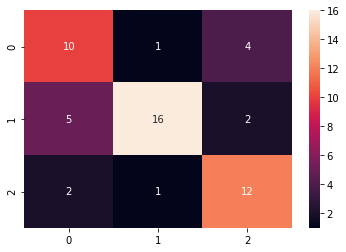

In [31]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_mat, annot=True)

In [32]:
%store -r Y2Edel

In [34]:
Y2Edel.shape

(4941, 198)

In [35]:
y_pred2 = stacking.predict(Y2Edel)
y_pred2

array([2, 1, 1, ..., 1, 1, 0], dtype=int64)

In [36]:
df22 = pd.DataFrame(y_pred2)
df22.columns = ["Labels"]

In [37]:
%store -r dfEdelTweet

In [38]:
dfEdelTweet["Labels"] = df22["Labels"]
dfEdelTweet = dfEdelTweet.drop("Label",axis=1)
dfEdelTweet

,Tweets,Labels
0,@sadhika_tiwari: A 46-year-old dies after vac...,2
1,@mid_day: #MiddayNews | Consent form for #Cov...,1
2,@TimesNow: #Breaking | Bharat Biotech to pay ...,1
3,"@the_fauxy: After No Side Effect Of Covaxin, ...",1
4,"New Delhi, Jan 18 (PTI) Healthcare workers in ...",1
...,...,...
4936,#Covishield #CoronaVaccine https://t.co/eVoEIr...,0
4937,RT @SaketGokhale: To add to my prev. tweet: Op...,1
4938,RT @the_fauxy: After No Side Effect Of Covaxin...,1
4939,Tibetan health workers receive #Covishield vac...,1


In [40]:
filename = "Final_Edelman_Tweets.xlsx"

dfEdelTweet.to_excel(filename)